In [2]:
import tensorflow as tf 

In [20]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'training set {X_train.shape} \ntraining labels {X_train.shape} \ntest set {X_train.shape} \ntest labels {X_train.shape} \n')
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(f'after reshaping \ntraining set {X_train.shape} \ntraining labels {X_train.shape} \ntest set {X_train.shape} \ntest labels {X_train.shape} \n')

training set (60000, 28, 28) 
training labels (60000, 28, 28) 
test set (60000, 28, 28) 
test labels (60000, 28, 28) 

after reshaping 
training set (60000, 784) 
training labels (60000, 784) 
test set (60000, 784) 
test labels (60000, 784) 



In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

In [25]:
#Lets scale the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [26]:
sgd_clf_scaled = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_scaled.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [27]:
cross_val_score(sgd_clf_scaled, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [28]:
y_train_pred_scaled = cross_val_predict(sgd_clf_scaled, X_train, y_train, cv=3)

In [29]:
conf_mx = confusion_matrix(y_train, y_train_pred_scaled)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

In [44]:
conf_mx.T

array([[5635,    3,   72,   58,   11,   68,   40,   23,   40,   33],
       [   0, 6393,   56,   32,   26,   23,   13,   24,  101,   18],
       [  61,   95, 5174,  217,   46,   58,   56,  103,  158,   66],
       [  10,   21,   89, 4941,    6,  150,    6,   36,  122,   83],
       [  16,   16,   69,   23, 5298,   83,   22,  124,   49,  515],
       [  50,   47,   39,  441,   26, 4606,  113,   40,  457,  127],
       [  46,   15,  163,   32,   73,  174, 5625,   10,   77,    4],
       [   7,   27,   66,   56,   32,   26,    5, 5228,   35,  485],
       [  66,  109,  212,  216,   87,  152,   36,   75, 4666,  166],
       [  32,   16,   18,  115,  237,   81,    2,  602,  146, 4452]],
      dtype=int64)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

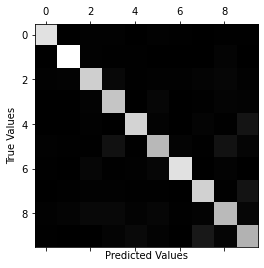

In [46]:
plt.matshow(conf_mx.T, cmap=plt.cm.gray)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

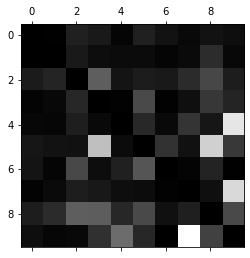

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx.T, cmap=plt.cm.gray)
plt.show()

In [37]:
prediction = sgd_clf_scaled.predict(X_test)
len(prediction)

10000

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            prediction,
                            target_names=[str(x) for x in range(0, 10)]))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.99      0.80      0.88      1135
           2       0.96      0.79      0.87      1032
           3       0.89      0.87      0.88      1010
           4       0.97      0.76      0.85       982
           5       0.99      0.42      0.59       892
           6       0.89      0.96      0.93       958
           7       0.98      0.79      0.87      1028
           8       0.46      0.96      0.62       974
           9       0.79      0.90      0.84      1009

    accuracy                           0.83     10000
   macro avg       0.88      0.82      0.83     10000
weighted avg       0.89      0.83      0.83     10000



In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8258